In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample

from openTSNE import TSNE, affinity, initialization
from umap import UMAP

In [ ]:
pd.set_option('display.max_columns', 50)

## Load data

In [2]:
df_l = pd.read_csv("data/celeba_buffalo_l.csv")

In [3]:
df_l_embeddings = df_l.select_dtypes("float")
df_l_features = df_l.select_dtypes("int").drop(columns=["id"])
df_l_images = df_l.loc[:, ["image_name", "id"]]

In [ ]:
df_l_features

## Precomputation

In [ ]:
def correlation_matrix(df: pd.DataFrame) -> None:
	fig = plt.subplots(figsize=(12, 10))
	corr = df.corr().abs()

	mask = np.triu(np.ones_like(corr, dtype=bool))
	sns.heatmap(corr, mask=mask, cmap="magma", square=True, vmin=0, vmax=1, center=0, annot=False)

correlation_matrix(df_l_features)

In [ ]:
corr = df_l_features.corr().abs()
corr

In [ ]:
upper = np.triu(np.ones(corr.shape, dtype=bool), k=1)
upper = corr.where(upper)

to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print(to_drop)

df_l_features.drop(columns=to_drop, axis=1, inplace=True)

In [ ]:
to_drop

In [ ]:
df_l_embeddings

## DR

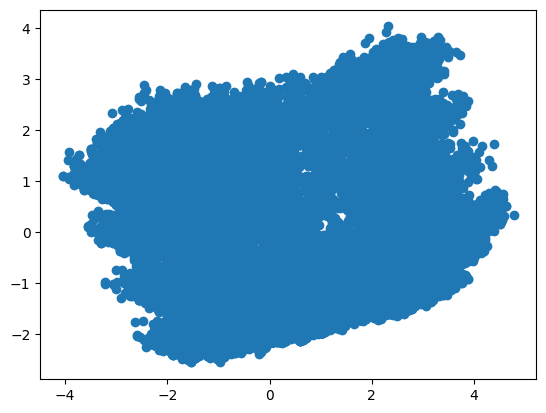

In [8]:
pca = PCA(n_components=2)
res = pca.fit_transform(df_l_features)
plt.scatter(x=res[:,0], y=res[:,1])

In [4]:
umap = UMAP()
res = umap.fit_transform(df_l_features)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


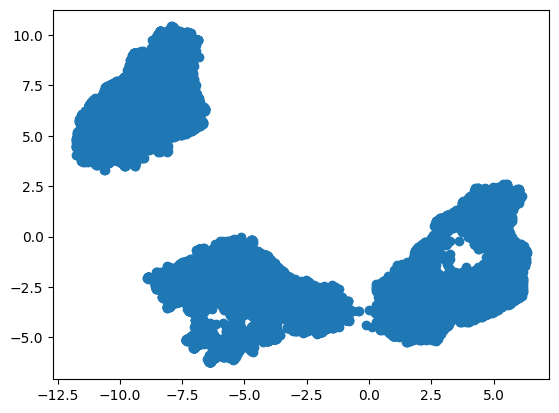

In [5]:
plt.scatter(x = res[:,0], y = res[:,1])

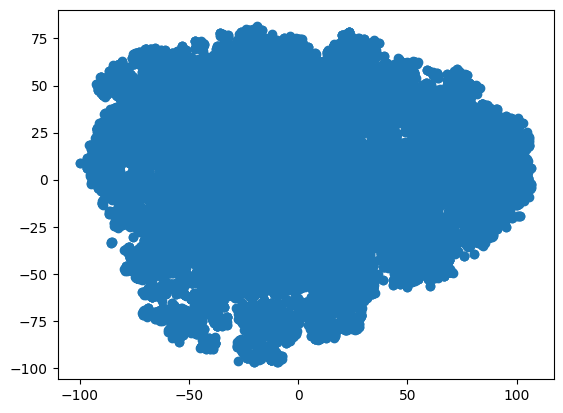

In [7]:
tsne = TSNE(n_components=2)
res = tsne.fit(np.array(df_l_features))

plt.scatter(x = res[:,0], y = res[:,1])

In [ ]:
aff50_features = affinity.PerplexityBasedNN(
	np.array(df_l_features),
	perplexity=50,
	n_jobs=-1,
	random_state=42
)

aff50_embeddings = affinity.PerplexityBasedNN(
	np.array(df_l_embeddings),
	perplexity=50,
	n_jobs=-1,
	random_state=42
)

In [ ]:
aff500_features = affinity.PerplexityBasedNN(
	np.array(df_l_features),
	perplexity=50,
	n_jobs=-1,
	random_state=42
)

aff500_embeddings = affinity.PerplexityBasedNN(
	np.array(df_l_embeddings),
	perplexity=50,
	n_jobs=-1,
	random_state=42
)

In [ ]:
df_l_features_sample = resample(df_l_features, replace=False, n_samples=1000, random_state=42)
df_l_embeddings_sample = resample(df_l_embeddings, replace=False, n_samples=1000)

In [ ]:
aff500_embeddings = affinity.PerplexityBasedNN(
	np.array(df_l_embeddings_sample),
	perplexity=50,
	n_jobs=-1,
	random_state=42
)

sample_init = initialization.pca(df_l_embeddings_sample, random_state=42)

tsne = TSNE(
	n_jobs=-1,
	random_state=42,
	verbose=True
)
res = tsne.fit(affinities=aff500_embeddings, initialization=sample_init)

In [ ]:
plt.scatter(x = res[:,0], y = res[:,1])

## Clustering

In [ ]:
df_s = pd.read_csv("data/celeba_buffalo_s.csv")
df_s.head(5)

In [ ]:
%%time
selected_features = ["5_o_Clock_Shadow", "Arched_Eyebrows"]
features_mask = df_l_features[selected_features].isin([1]).all(axis=1)

df_l_images[features_mask].loc[:, "image_name"][0:10]

In [ ]:
%%time
df_l_features_dict = df_l_features.to_dict("records")
df_l_features_dict

In [ ]:
df_l_features_dict

In [ ]:
df_s_embeddings = df_s.select_dtypes("float")
df_s_features = df_s.select_dtypes("int").drop(columns=["id"])
df_s_images = df_s.loc[:, ["image_name", "id"]]

# df_s_embeddings.to_parquet("data/celeba_buffalo_s__embeddings.gzip")
# df_s_embeddings.to_csv("data/celeba_buffalo_s__embeddings.csv")
# df_s_features.to_parquet("data/celeba_buffalo_s__features.gzip")
# df_s_images.to_parquet("data/celeba_buffalo_s__images.gzip")

In [ ]:
features.columns.to_list()

In [ ]:
FEATURE = "Eyeglasses"

def histogram_of_feature(df, feature: str):
	ax = df[feature].replace({-1: "no", 1: "yes"}).hist(bins=3, rwidth=0.8, alpha=0.6, color="c")
	
	ax.set_xlabel("Features")
	ax.set_ylabel("Frequency")
	ax.set_title(f"Histogram of {FEATURE}")

histogram_of_feature(features, FEATURE)

In [ ]:
def feature_presence_counter(df):
	#df[feature].replace({-1: "no", 1: "yes"}).unique()
	counts = pd.DataFrame({col: df[col].value_counts() for col in df})
	counts = counts.iloc[1]
	counts = counts.sort_values(ascending=False)
	counts = pd.DataFrame(counts).reset_index()
	counts.columns = ["Feature", "Count"]
	return counts

feature_presence_counter(df_l_features)

In [ ]:
def feature_presence_couter_plot(df):
	counts = pd.DataFrame({col: df[col].value_counts() for col in df})
	counts = counts.iloc[1]
	counts = counts.sort_values(ascending=False)

	fig, ax = plt.subplots(figsize=(8, 6))
	counts.plot(kind="bar", ax=ax)

	ax.set_title("Most present features")
	ax.set_xlabel("Feature")
	ax.set_ylabel("Count")

feature_presence_couter_plot(features)

In [ ]:
feature_presence_couter_plot(subset2)

In [ ]:
def correlation_between_feature(df):
	fig = plt.subplots(figsize=(12, 10))
	corr = df.corr().abs()

	mask = np.triu(np.ones_like(corr, dtype=bool))
	sns.heatmap(corr, mask=mask, cmap="magma", square=True, vmin=0, vmax=1, center=0, annot=False)

In [ ]:
correlation_between_feature(features)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="No_Beard", y="embedding_0", data=df1, palette="Set3")

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="No_Beard", y="embedding_0", data=df2, palette="Set3")